In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import Quandl
%pylab inline
sb.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


O objetivo aqui é apresentar o cálculo dos retornos para uma série temporal de um ativo financeiro utilizando o Pandas.

## O que são retornos?

Os retornos representam a variação percentual do valor absoluto de um ativo financeiro.
Os retornos são calculado de duas formas:

- Retornos Aritméticos
$$
R_t = \frac{S_t - S_{t-1}}{S_{t-1}}
$$

- Retornos Logaritimicos
$$
r_t = \ln \frac{S_t}{S_{t-1}}
$$

onde $S_t$ é o valor absoluto do ativo no instante $t$.

## Cálculo dos retornos aritiméticos com Pandas

Para calcular os retornos vamos considerar um ativo $S_t$ que representa o seu valor absoluto no instante $t$.
Vamos utilizar a série temporal do IBOVESPA com frequência mensal, onde cada valor é referente ao preço de fechamento do índice no último dia útil de cada mês.
Esta série temporal será obtida usando o Quandl para baixar os dados disponibilizados pelo Banco Central (BCB) e os dados serão a partir de 1999, período após a estabilização da moeda.

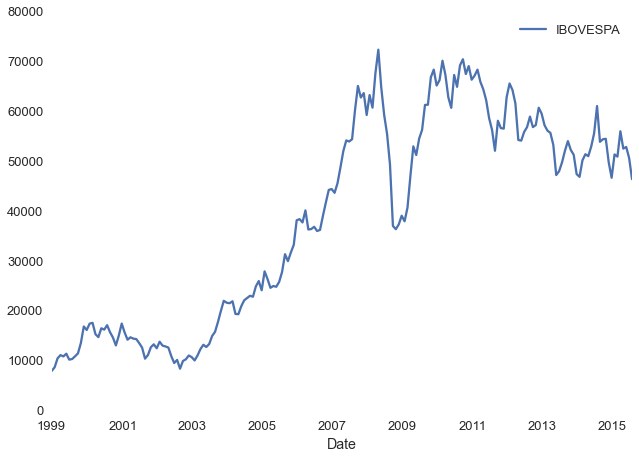

In [30]:
# Download da série mensal do IBOVESPA
data = Quandl.get("BCB/7845", trim_start="1999-01-01")
# Renomear a série
data.columns = ['IBOVESPA']
# Visualizar a série temporal
data.plot();

Para calcular os retornos, vamos começar pelo aritimético, é preciso fazer a conta $S_t - S_{t-1}$ e dividir por $S_{t-1}$.
Vamos começar definindo a série $S_t$.

In [31]:
S_t = data["IBOVESPA"]
S_t.head()

Date
1999-01-31     8171
1999-02-28     8910
1999-03-31    10696
1999-04-30    11350
1999-05-31    11089
Name: IBOVESPA, dtype: float64

A série de $S_{t-1}$ pode ser construída deslocando a série $S_t$ com o método `shift`.

In [32]:
S_t1 = S_t.shift(1)
S_t1.head()

Date
1999-01-31      NaN
1999-02-28     8171
1999-03-31     8910
1999-04-30    10696
1999-05-31    11350
Name: IBOVESPA, dtype: float64

Dessa forma, o primeiro dia fica com `NaN`, pois dado se considerarmos o primeiro dado como $S_0$, não existe $S_{-1}$.
Note que para criar $S_{t-1}$ utilizamos `shift(1)`, que pode parecer contraintuitivo no primeiro momento, mas é importante entender que a referência é o instante $t$ e que devemos trazer o dado de $t-1$ para $t$.

Para o cálculo dos retornos podemos aplicar diretamente a fórmula definida anteriormente: $\frac{S_t - S_{t-1}}{S_{t-1}}$.

In [33]:
data["IBOVESPA_RETA"] = (S_t - S_t1)/S_t1
data.head()

,IBOVESPA,IBOVESPA_RETA
Date,,
1999-01-31,8171,NaN
1999-02-28,8910,0.090442
1999-03-31,10696,0.200449
1999-04-30,11350,0.061144
1999-05-31,11089,-0.022996


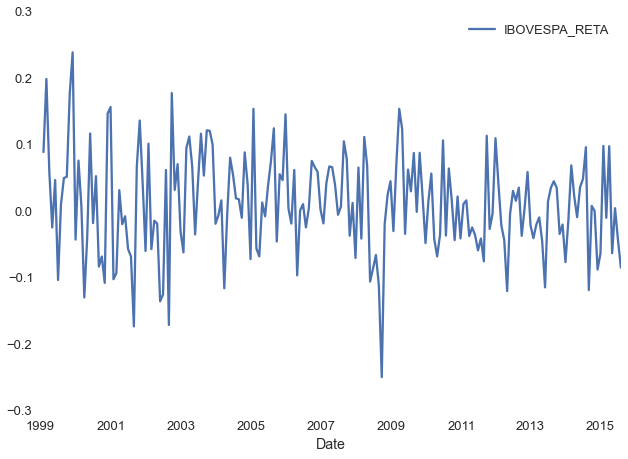

In [34]:
data[["IBOVESPA_RETA"]].plot();

Esse mesmo cálculo pode ser feito de forma mais direta, sem a criação de variáveis auxiliares.
Para isso devemos usar o método `diff` do `DataFrame`.
Este método tira a diferença entre os elementos: do segundo para o primeiro, do terceiro para o segundo e assim por diante.
Dessa forma, combinando `diff` com `shift` podemos calcular os retornos diretamente.

In [35]:
data["IBOVESPA_RETA"] = data["IBOVESPA"].diff()/data["IBOVESPA"].shift(1)
data.head()

,IBOVESPA,IBOVESPA_RETA
Date,,
1999-01-31,8171,NaN
1999-02-28,8910,0.090442
1999-03-31,10696,0.200449
1999-04-30,11350,0.061144
1999-05-31,11089,-0.022996


## Cálculo dos retornos logaritimicos com Pandas

O cálculo dos retornos logaritimicos, log-retornos, fica mais simples se fizermos uma transformação na fórmula usando uma propriedade do logarítimo

$$
\ln \frac{S_t}{S_{t-1}} = \ln S_t - \ln S_{t-1}
$$

Dessa maneira podemos aplicar `log` a série e em seguida aplicar `diff`.

In [36]:
data["IBOVESPA_RETL"] = np.log(data["IBOVESPA"]).diff()
data.head()

,IBOVESPA,IBOVESPA_RETA,IBOVESPA_RETL
Date,,,
1999-01-31,8171,NaN,NaN
1999-02-28,8910,0.090442,0.086583
1999-03-31,10696,0.200449,0.182696
1999-04-30,11350,0.061144,0.059348
1999-05-31,11089,-0.022996,-0.023264


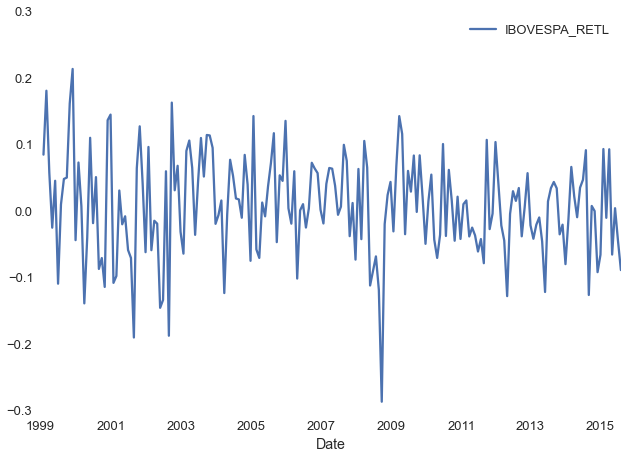

In [39]:
data[["IBOVESPA_RETL"]].plot();

Como podemos observar a diferença entre os retornos é muito pequena, em valores absolutos mesmo.
Em finanças é mais comum a utilização dos log-retornos por que é mais fácil fazer contas com os logarítimos.

## Conclusão

Vimos como é fácil calcular retornos com Pandas (sem usar loops) e que usando os métodos `diff` e `shift` foi possível se expressar de forma clara para realizar os cálculos.